In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
house = datasets.load_boston()

In [2]:
house_x = house['data']
house_y = house['target']
name = house['feature_names']
houseDf = pd.DataFrame(house.data)
print("该数据集有{}组数据".format(houseDf.shape[0]))
print("该数据集有{}个特征".format(houseDf.shape[1]))

该数据集有506组数据
该数据集有13个特征


In [4]:
#dataDf         dataframe 波士顿数据集的特征
#house_priceDf  dataframe 波士顿数据集的房价
#houseDf        dataframe 波士顿数据集特征、房价的整合

dataDf = pd.DataFrame(house.data, columns=house.feature_names)
house_priceDf = pd.DataFrame(house.target, columns=['MEDV'])
houseDf = pd.concat([dataDf, house_priceDf], axis=1)

In [5]:
#数据的描述信息
houseDf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**plot.bar()柱状图**

<AxesSubplot:>

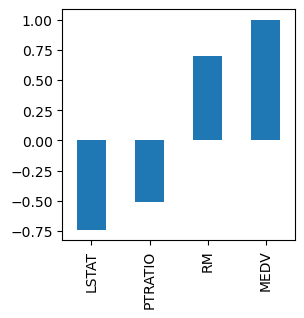

In [6]:
#查看各个特征与MEDV的相关系数

plt.figure(figsize=(3,3))
corr = houseDf.corr()
MEDVcorr = corr['MEDV']
MEDVcorr[abs(MEDVcorr)>0.5].sort_values().plot.bar()

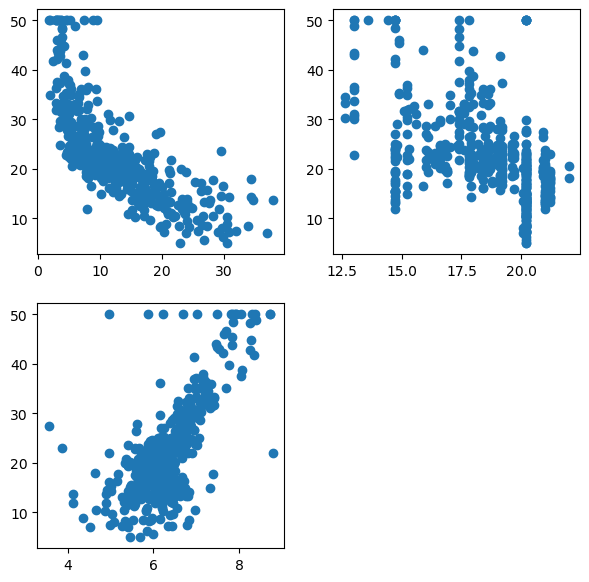

In [7]:
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.scatter(houseDf['LSTAT'], houseDf['MEDV'])
plt.subplot(222)
plt.scatter(houseDf['PTRATIO'], houseDf['MEDV'])
plt.subplot(223)
plt.scatter(houseDf['RM'],houseDf['MEDV'])

In [10]:
#剔除异常数据
#house_delDf dataframe 更新的数据集

abnormal_data_index = houseDf[(houseDf.MEDV>=50)].index.tolist()
house_delDf = houseDf.drop(index=abnormal_data_index,axis =0)

(490, 14)

In [12]:
#取出R2大于0.5的标签与MEDV作为新的数据集
#house_finalDf dataframe 更新的数据集

house_finalDf = pd.concat([house_delDf['LSTAT'], house_delDf['PTRATIO'], house_delDf['RM'], house_delDf['MEDV']], axis = 1)

In [20]:
#划分训练集和测试集
#train_data dataframe 训练集
#test_data  dataframe 测试集

train_data = house_finalDf.sample(frac = 0.8)               
test_data = house_finalDf[~house_delDf.index.isin(train_data.index)]

In [21]:
#分别划分训练集和测试集中的MEDV
#y_train ndarray(m,) 训练集目标值
#y_test  ndarray(m,) 测试集目标值

y_train = np.array(train_data['MEDV'])
y_test = np.array(test_data['MEDV'])

In [22]:
train_data.drop('MEDV',axis=1, inplace=True)
test_data.drop('MEDV',axis=1,inplace=True)

In [41]:
#分别划分训练集和测试集中的X
#X_train ndarray(m,n) 训练集特征值
#X_test  ndarray(m,n) 测试集特征值

X_train = np.array(train_data)
X_test = np.array(test_data)

## 无量纲化

### Max-Min normalization

In [28]:
def mm_normalX(X):
    """
    输入：
    X ndarray(m,n)
    
    输出：
    X_m ndarray(m,n)
    """
    max_m = np.max(X,axis=0)
    min_m = np.min(X,axis=0)
    mean = np.mean(X,axis=0)
    
    
    X_m = np.ones((X.shape[0], X.shape[1]), dtype=np.float) 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_m[i][j] = (X[i][j] - min_m[j])/(max_m[j]-min_m[j])
    
    return X_m

In [29]:
def mm_normaly(y):
    """
    输入：
    y ndarray(n,)
    
    输出：
    y_m ndarray(n,)
    """
    max_m = np.max(y,axis=0)
    min_m = np.min(y,axis=0)
    mean = np.mean(y,axis=0)
    
    y_m = np.zeros(y.shape[0])
    y_m = (y-min_m)/(max_m-min_m)
    return y_m

In [30]:
#对训练集Min-Max归一化
X_train_mm = mm_normalX(X_train)
y_train_mm = mm_normaly(y_train)
#对测试集Min-Max归一化
X_test_mm = mm_normalX(X_test)
y_test_mm = mm_normaly(y_test)

### Mean normalization

In [31]:
def mean_normalX(X):
    max_m = np.max(X,axis=0)
    min_m = np.min(X,axis=0)
    mean = np.mean(X,axis=0)
    
    
    X_m = np.ones((X.shape[0], X.shape[1]), dtype=np.float) 
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_m[i][j] = (X[i][j] - mean[j])/(max_m[j]-min_m[j])
    
    return X_m

In [32]:
def mean_normaly(y):
    max_m = np.max(y,axis=0)
    min_m = np.min(y,axis=0)
    mean = np.mean(y,axis=0)
    
    y_m = np.zeros(y.shape[0])
    y_m = (y-mean)/(max_m-min_m)
    return y_m

In [33]:
#对训练集进行平均归一化
X_train_m = mean_normalX(X_train)
y_train_m = mean_normaly(y_train)
#对测试集进行平均归一化
X_test_m = mean_normalX(X_test)
y_test_m = mean_normaly(y_test)

### normalization

In [85]:
def normalX(update_max, update_min, X):
    m,n = X.shape
    max_m = np.max(X,axis=0)
    min_m = np.min(X,axis=0)
    mean = np.mean(X,axis=0)
    X_n = np.ones((X.shape[0], X.shape[1]), dtype=np.float) 
    
    for i in range(m):
        for j in range(n):
            X_n[i][j] = (update_max - update_min)*(X[i][j]-min_m[j])/(max_m[j]-min_m[j]) + update_min
    return X_n

In [86]:
def normaly(update_max, update_min, y):
    
    y_n = np.zeros(y.shape[0])
    max_m = np.max(y,axis=0)
    min_m = np.min(y,axis=0)
    mean = np.mean(y,axis=0)
    y_n = (update_max - update_min)*(y-min_m)/(max_m-min_m) + update_min
   
    return y_n

In [172]:
X_train_n=normalX(1.5,-1.5,X_train)
X_train_n[:,1]=normaly(1,-1,X_train[:,1])
#max_m=np.max(X_train,axis=0)
#min_m=np.min(X_train,axis=0)
#min_m
X_train_n

array([[-0.24048347,  0.10638298, -0.04512359],
       [-0.31300361,  0.61702128,  0.15261544],
       [-0.29466518,  0.61702128,  0.04627323],
       ...,
       [-0.05043068,  0.61702128,  0.13479594],
       [-0.59224785,  0.61702128,  0.03362713],
       [-0.49055293,  0.76595745, -0.02500479]])

In [140]:
y_train_n = normaly(1,-1,y_train)

### z_score

In [173]:
def z_score(X):
    """
    输入:
    X ndarray(m,n)
    
    输出：
    X_z ndarray(m,n)
    """
    X_z = []
    mean = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_z = (X-mean)/sigma
    return X_z

In [174]:
#标准化
X_train_z = z_score(X_train)

In [175]:
X_max = np.max(X_train,axis=0)
X_min = np.min(X_train,axis=0)

y_max = np.max(y_train,axis=0)
y_min = np.min(y_train,axis=0)
y_mean = np.mean(y_train,axis=0)

## 线性回归分析

### 损失函数

In [104]:
def cost_compute(X, y, w, b):
    """
    输入：
    X ndarray(m,n) m为例子个数 n为特征个数
    y ndarray(m,)  m个例子的因变量计算结果
    w ndarray(n,)  n个特征的权重计算结果
    b scaler
    
    输出：
    cost scaler
    """
    
    f_wb_xi = 0
    total_cost = 0
    m,n = X.shape
    for i in range (m):
        f_wb_xi = np.dot(X[i], w) + b
        total_cost = total_cost + (f_wb_xi - y[i])**2
    cost = 1/(2*m) * total_cost
    return cost

### 求偏导函数

In [105]:
def derivate_compute(X, y, w, b):
    """
    输入：
    X ndarray(m,n) m为例子个数 n为特征个数
    y ndarray(m,)  m个例子的因变量计算结果
    w ndarray(n,)  n个特征的权重计算结果
    b scaler
    
    输出：
    dj_dw ndarray(n,)
    dj_db scaler
    """
    m,n = X.shape
    
    dj_dw = [0]*X.shape[1]
    dj_db = 0
    
    for i in range(m):
        temp = np.dot(X[i], w) + b - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + temp*X[i,j] 
        dj_db = dj_db + temp
    dj_dw = np.array(dj_dw)
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

### 梯度下降函数

In [106]:
def gradient_descent_compute(X, y, w, b, cost_compute, derivate_compute, iteration, alpha):
    """
    输入：
    X         ndarray(m,n) m为例子个数 n为特征个数
    y         ndarray(m,)  m个例子的因变量计算结果
    w         ndarray(n,)  n个特征的权重计算结果
    b         scaler
    iteration scaler       学习次数
    alpha     scaler       学习效率
    
    输出：
    cost      scaler
    w_final   scaler
    b_final   scaler
    """
    j = 0
    
    for i in range(iteration):
        cost = cost_compute(X, y, w, b)
        dj_dw, dj_db = derivate_compute(X, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i%100==0:
            print(f"Iterations {i:4d}: Cost{cost:7.2f}")
        
    w_final = w
    b_final = b
    
   #return cost, w_final, b_final
    return w_final, b_final

In [176]:
w_init = np.random.uniform(0,2,X_train_mm.shape[1])
w_init = np.array(w_init)
b_init = 0
iteration = 100000
alpha = 0.0001

w_final, b_final = gradient_descent_compute(X_train_n, y_train_n, w_init, b_init, cost_compute, derivate_compute, iteration, alpha)
w_final

Iterations    0: Cost   1.06
Iterations  100: Cost   1.05
Iterations  200: Cost   1.04
Iterations  300: Cost   1.03
Iterations  400: Cost   1.02
Iterations  500: Cost   1.01
Iterations  600: Cost   1.00
Iterations  700: Cost   0.99
Iterations  800: Cost   0.98
Iterations  900: Cost   0.97
Iterations 1000: Cost   0.96
Iterations 1100: Cost   0.95
Iterations 1200: Cost   0.94
Iterations 1300: Cost   0.93
Iterations 1400: Cost   0.92
Iterations 1500: Cost   0.92
Iterations 1600: Cost   0.91
Iterations 1700: Cost   0.90
Iterations 1800: Cost   0.89
Iterations 1900: Cost   0.88
Iterations 2000: Cost   0.87
Iterations 2100: Cost   0.87
Iterations 2200: Cost   0.86
Iterations 2300: Cost   0.85
Iterations 2400: Cost   0.84
Iterations 2500: Cost   0.84
Iterations 2600: Cost   0.83
Iterations 2700: Cost   0.82
Iterations 2800: Cost   0.81
Iterations 2900: Cost   0.81
Iterations 3000: Cost   0.80
Iterations 3100: Cost   0.79
Iterations 3200: Cost   0.79
Iterations 3300: Cost   0.78
Iterations 340

Iterations 27700: Cost   0.13
Iterations 27800: Cost   0.13
Iterations 27900: Cost   0.13
Iterations 28000: Cost   0.13
Iterations 28100: Cost   0.13
Iterations 28200: Cost   0.13
Iterations 28300: Cost   0.13
Iterations 28400: Cost   0.13
Iterations 28500: Cost   0.13
Iterations 28600: Cost   0.13
Iterations 28700: Cost   0.13
Iterations 28800: Cost   0.13
Iterations 28900: Cost   0.12
Iterations 29000: Cost   0.12
Iterations 29100: Cost   0.12
Iterations 29200: Cost   0.12
Iterations 29300: Cost   0.12
Iterations 29400: Cost   0.12
Iterations 29500: Cost   0.12
Iterations 29600: Cost   0.12
Iterations 29700: Cost   0.12
Iterations 29800: Cost   0.12
Iterations 29900: Cost   0.12
Iterations 30000: Cost   0.12
Iterations 30100: Cost   0.12
Iterations 30200: Cost   0.12
Iterations 30300: Cost   0.11
Iterations 30400: Cost   0.11
Iterations 30500: Cost   0.11
Iterations 30600: Cost   0.11
Iterations 30700: Cost   0.11
Iterations 30800: Cost   0.11
Iterations 30900: Cost   0.11
Iterations

Iterations 55100: Cost   0.04
Iterations 55200: Cost   0.04
Iterations 55300: Cost   0.04
Iterations 55400: Cost   0.04
Iterations 55500: Cost   0.04
Iterations 55600: Cost   0.04
Iterations 55700: Cost   0.04
Iterations 55800: Cost   0.04
Iterations 55900: Cost   0.04
Iterations 56000: Cost   0.04
Iterations 56100: Cost   0.04
Iterations 56200: Cost   0.04
Iterations 56300: Cost   0.04
Iterations 56400: Cost   0.04
Iterations 56500: Cost   0.04
Iterations 56600: Cost   0.04
Iterations 56700: Cost   0.04
Iterations 56800: Cost   0.04
Iterations 56900: Cost   0.04
Iterations 57000: Cost   0.04
Iterations 57100: Cost   0.04
Iterations 57200: Cost   0.04
Iterations 57300: Cost   0.04
Iterations 57400: Cost   0.04
Iterations 57500: Cost   0.04
Iterations 57600: Cost   0.04
Iterations 57700: Cost   0.04
Iterations 57800: Cost   0.04
Iterations 57900: Cost   0.04
Iterations 58000: Cost   0.04
Iterations 58100: Cost   0.04
Iterations 58200: Cost   0.04
Iterations 58300: Cost   0.04
Iterations

Iterations 82500: Cost   0.03
Iterations 82600: Cost   0.03
Iterations 82700: Cost   0.03
Iterations 82800: Cost   0.03
Iterations 82900: Cost   0.03
Iterations 83000: Cost   0.03
Iterations 83100: Cost   0.03
Iterations 83200: Cost   0.03
Iterations 83300: Cost   0.03
Iterations 83400: Cost   0.03
Iterations 83500: Cost   0.03
Iterations 83600: Cost   0.03
Iterations 83700: Cost   0.03
Iterations 83800: Cost   0.03
Iterations 83900: Cost   0.03
Iterations 84000: Cost   0.03
Iterations 84100: Cost   0.03
Iterations 84200: Cost   0.03
Iterations 84300: Cost   0.03
Iterations 84400: Cost   0.03
Iterations 84500: Cost   0.03
Iterations 84600: Cost   0.03
Iterations 84700: Cost   0.03
Iterations 84800: Cost   0.03
Iterations 84900: Cost   0.03
Iterations 85000: Cost   0.03
Iterations 85100: Cost   0.03
Iterations 85200: Cost   0.03
Iterations 85300: Cost   0.03
Iterations 85400: Cost   0.03
Iterations 85500: Cost   0.03
Iterations 85600: Cost   0.03
Iterations 85700: Cost   0.03
Iterations

array([-0.20541614, -0.06065252,  0.56855799])

In [177]:
result = np.dot(X_test[3],w_final)
print(f"result:{result:7.2f}   y:{y_test[3]:7.2f}")

result:  -0.57   y:  20.20


In [178]:
def predict(X,w,b):
    m,n = X.shape
    y_hat = []
    for i in range(m):
        y = np.dot(w,X[i])+b
        y_hat.append(y)
    y_hat = np.array(y_hat)
    return y_hat

In [179]:
y_hat = predict(X_test,w_final,b_final)

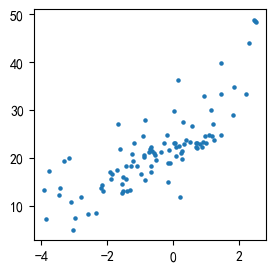

In [180]:
plt.figure(figsize=(3,3))
plt.scatter(y_hat,y_test,s=5)

In [181]:
#反归一化Min-Max
def inverse_transform_mm(y_hat, y_max, y_min):
    y_pre = np.zeros(y_hat.shape[0])
    y_pre = y_hat*(y_max-y_min)+y_min
    y_pre = np.array(y_pre)
    return y_pre

In [182]:
#反归一化Mean
def inverse_transform_m(y_hat, y_max, y_min, y_mean):
    y_pre = np.zeros(y_hat.shape[0])
    y_pre = y_hat*(y_max-y_min)+y_mean 
    y_pre = np.array(y_pre)
    return y_pre

In [183]:
#反归一化normal
def inverse_transform_n(y_hat, y_max, y_min, update_max, update_min):
    y_pre = np.zeros(y_hat.shape[0])
    y_pre = (y_hat-update_min)*(y_max-y_min)/(update_max-update_min)+y_min
    y_pre = np.array(y_pre)
    return y_pre

In [184]:
y_pre_mm = inverse_transform_mm(y_hat,y_max,y_min)

In [185]:
y_pre_m = inverse_transform_m(y_hat,y_max,y_min,y_mean)

In [186]:
y_pre_n = inverse_transform_n(y_hat,y_max, y_min,1,-1)

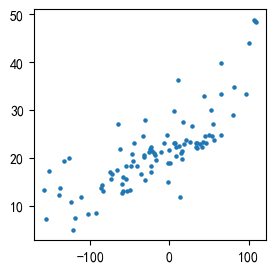

In [187]:
#Min-Max预测值拟合程度
plt.figure(figsize=(3,3))
plt.scatter(y_pre_mm,y_test,s=5)

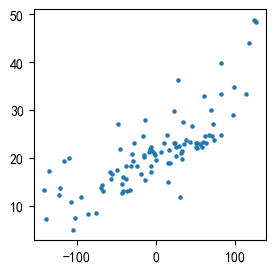

In [188]:
#Mean预测值拟合程度
plt.figure(figsize=(3,3))
plt.scatter(y_pre_m,y_test,s=5)

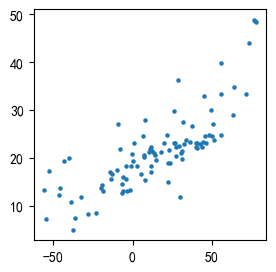

In [189]:
#normal预测值拟合程度
plt.figure(figsize=(3,3))
plt.scatter(y_pre_n,y_test,s=5)

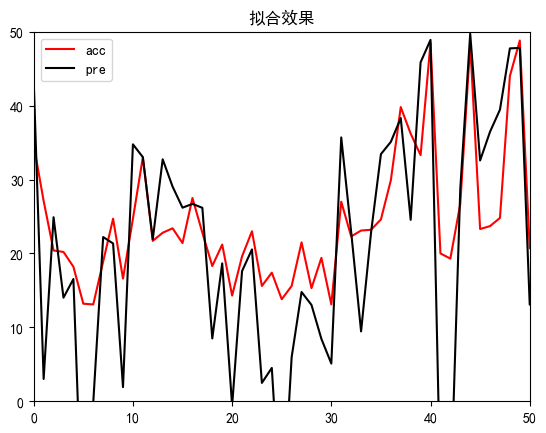

In [171]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
acc = y_test
pre = y_pre_n
plt.plot(acc, color="r", label="acc")
plt.plot(pre,color=(0,0,0),label="pre")
plt.axis([0,50,0,50])
plt.title("拟合效果")
plt.legend()
plt.show()